In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
# Part A

f = h5py.File('assign3_data1.h5', 'r')
dataKeys = list(f.keys())
print('The data keys are:' + str(dataKeys))

# Gathering the  train images, test images, train labels and test labels.
data = f['data']
invXForm = f['invXForm']
xForm = f['xForm']

# data=np.array(data)
# invXForm=np.array(invXForm)
# xForm=np.array(xForm)

# data = data.reshape(-1,16,16,3)

print('The size of data is: ' + str(np.shape(data)))
print('The size of invXForm is: ' + str(np.shape(invXForm)))
print('The size of xForm is: ' + str(np.shape(xForm)))

The data keys are:['data', 'invXForm', 'xForm']
The size of data is: (10240, 3, 16, 16)
The size of invXForm is: (105, 768)
The size of xForm is: (768, 105)


In [3]:
data_r = data[:,0,:,:]
data_g = data[:,1,:,:]
data_b = data[:,2,:,:]

data_grayscale = data_r*0.2126 + data_g*0.7152 + data_b*0.0722
print(np.shape(data_grayscale))

(10240, 16, 16)


In [4]:
def normalize_data(images):
    data_mean = np.mean(images, axis=(1,2))
    for i in range(np.shape(data_mean)[0]):
        images[i,:,:] -= data_mean[i]
    return images

In [5]:
def map_std(images):
    data_std = np.std(images)
    mapped_data = np.where(images > 3*data_std, 3*data_std, images)
    mapped_data_final = np.where(mapped_data < -3*data_std, -3*data_std, mapped_data)
    return mapped_data_final

In [6]:
def clip_data_range(images, min_value, max_value):
    range_val = max_value - min_value
    max_data = np.max(images)
    min_data = np.min(images)
    
    result = images - min_data

    max_data = np.max(result)
    result = result / max_data * range_val

    result = result + min_value
    return result

In [7]:
data_grayscale_norm = normalize_data(data_grayscale)
data_grayscale_norm_mapped = map_std(data_grayscale_norm)
data_final = clip_data_range(data_grayscale_norm_mapped, 0.1, 0.9)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

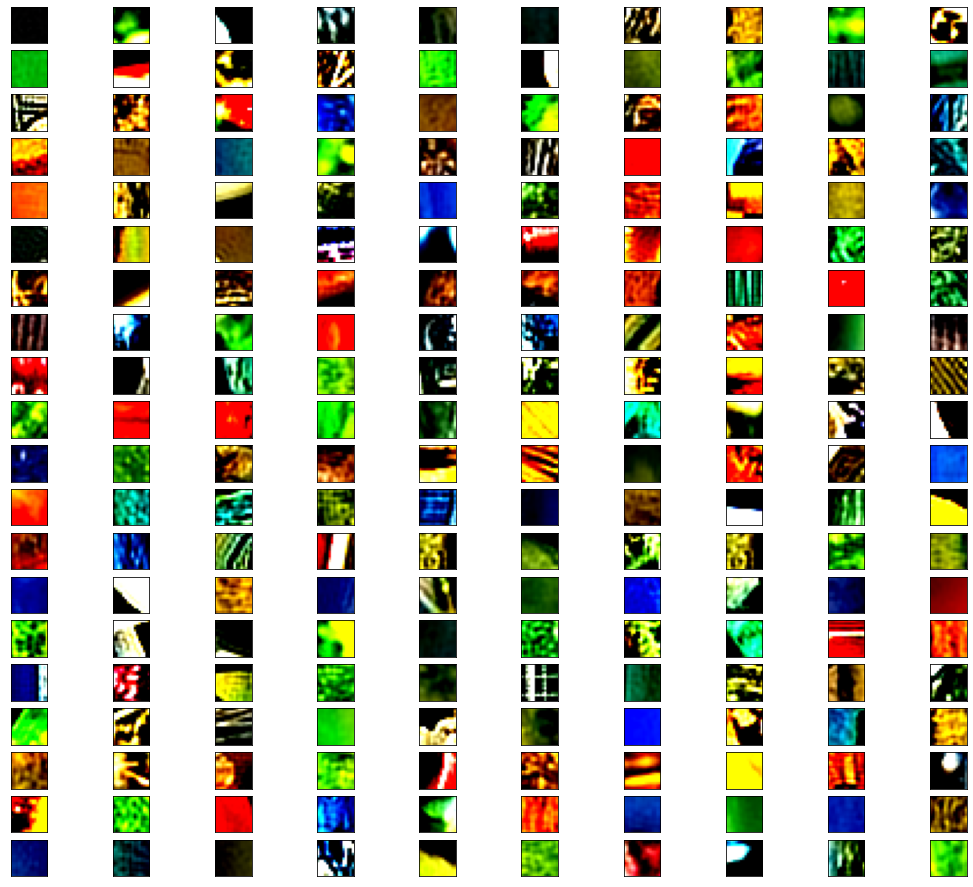

In [8]:
figureNum = 0
plt.figure(figureNum, figsize=(18, 16))
np.random.seed(9)
sample_size = np.shape(data_final)[0]
random_200 = np.random.randint(sample_size, size=(200))

for i,value in enumerate(random_200):
    ax1 = plt.subplot(20, 10,i+1)
    ax1.imshow(np.transpose(data[value], (1,2,0)))
    ax1.set_yticks([])
    ax1.set_xticks([])
    
plt.show()

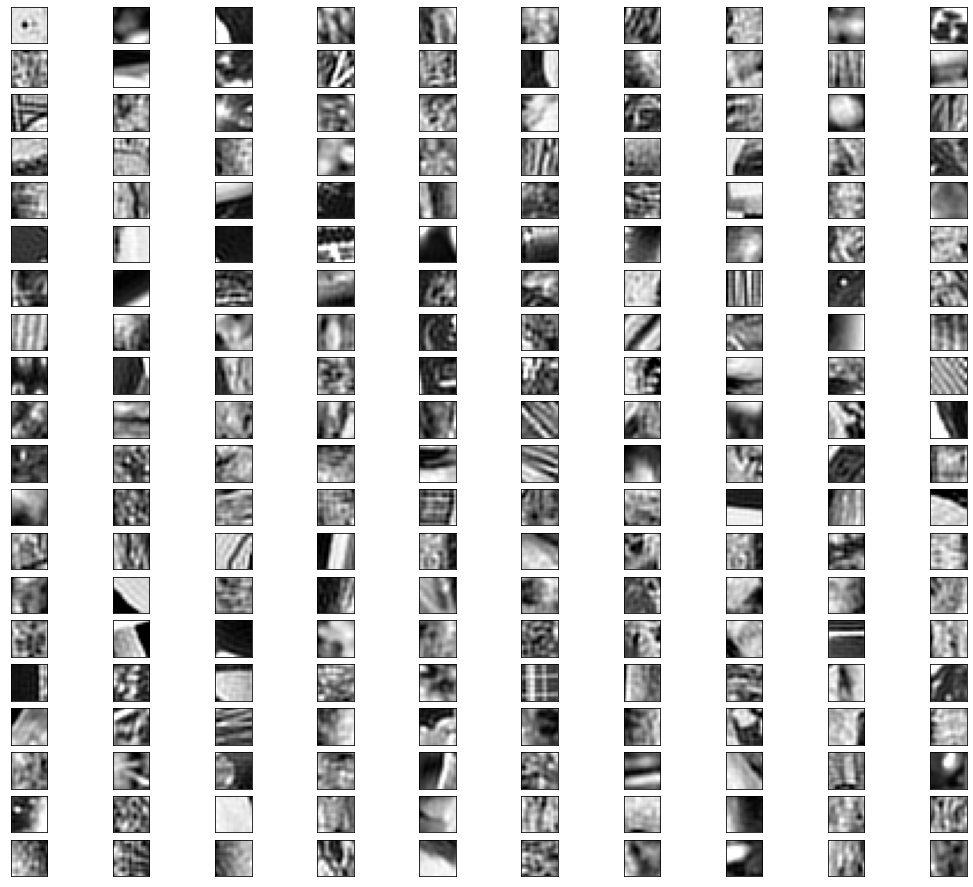

In [9]:
figureNum += 1
plt.figure(figureNum, figsize=(18, 16))

for subplot,value in enumerate(random_200):
    ax2 = plt.subplot(20, 10,subplot+1)
    ax2.imshow(data_final[value], cmap='gray')
    ax2.set_yticks([])
    ax2.set_xticks([])
plt.show()

In [10]:
# Part B

def sigmoid(x):   

    result = 1 / (1 + np.exp(-x))
    return result

def der_sigmoid(x):

    result = sigmoid(x) * (1 - sigmoid(x))
    return result


def forward(We, data):      

    W1, B1, W2, B2 = We
    
    # HIDDEN LAYER
    A1 = data.dot(W1) + B1
    Z1 = sigmoid(A1)
    # OUTPUT LAYER
    A2 = Z1.dot(W2) + B2
    y_pred = sigmoid(A2)  
    
    
    return A1, Z1, A2, y_pred

                   
def aeCost(We, data, params):
    Lin, Lhid, lambdaa, beta, rho = params
    W1, B1, W2, B2  = We
    sample_size = np.shape(data)[0]

    A1, Z1, A2, y_pred = forward(We, data)
    Z1_mean = np.mean(Z1, axis=0)

    J_1 = (1/(2*sample_size))*np.sum(np.power((data - y_pred),2))
    J_2 = (lambdaa / 2)* (np.sum(W1**2) + np.sum(W2**2))
    KL_1 = rho*np.log(Z1_mean/rho)
    KL_2 = (1-rho)*np.log((1-Z1_mean)/(1-rho))
    J_3 =  beta*np.sum(KL_1+KL_2)
    J = J_1 + J_2 - J_3

    del_out = -(data - y_pred) * der_sigmoid(y_pred)

    del_KL = beta*(-(rho/Z1_mean.T)+((1-rho)/(1-Z1_mean.T)))
    del_KLs =  np.vstack([del_KL]*sample_size)

    del_hidden = ((del_out.dot(W1)) + del_KLs) * der_sigmoid(Z1)

    # Gradients               
    grad_W2 = (1/ sample_size)*(Z1.T.dot(del_out) + lambdaa*W2)                   
    grad_B2 = np.mean(del_out, axis=0, keepdims = True)

    grad_W1 = (1/ sample_size)*(data.T.dot(del_hidden) + lambdaa*W1)
    grad_B1 = np.mean(del_hidden, axis=0, keepdims = True)  

    gradients = [grad_W2, grad_B2, grad_W1, grad_B1]

    return J, gradients                   


def update_weights(We, data, params, learning_rate):
                
    J, gradients = aeCost(We, data, params)               
    grad_W2, grad_B2, grad_W1, grad_B1 = gradients 
    W1, B1, W2, B2 = We
                   
    # Update weights
    
    W2  -= learning_rate * grad_W2
    B2 -= learning_rate * grad_B2

    W1  -= learning_rate * grad_W1
    B1 -= learning_rate * grad_B1  
    

    We_updated = [W1, B1, W2, B2]
    return J, We_updated
                                     

def initialize_weights(Lpre, Lhid):
                   
    np.random.seed(8)   
    
    Lpost = Lpre
    lim_1 = np.sqrt(6/(Lpre+Lhid))  
    lim_2 = np.sqrt(6/(Lhid+Lpost)) 

    W1 = np.random.uniform(-lim_1, lim_1, (Lpre,Lhid))
    B1 = np.random.uniform(-lim_1, lim_1, (1,Lhid))
                   
    W2 = np.random.uniform(-lim_2, lim_2, (Lhid,Lpost))
    B2 = np.random.uniform(-lim_2, lim_2, (1,Lpost))

    return W1, B1, W2, B2                   


def train_network(data, params, learning_rate, batch_size, epoch):
                   
    np.random.seed(8)
    
    sample_size = np.shape(data)[0]
    Lin, Lhid, lambdaa, beta, rho = params
    W1, B1, W2, B2  = initialize_weights(Lin, Lhid)

    We = [W1, B1, W2, B2]
    Loss = list()
    for i in range(epoch):
        if(i % 10 == 0):
            print('Epoch: ' + str(i))    
        # Randomize the dataset for each iteration
        randomIndexes = np.random.permutation(sample_size) 
        data = data[randomIndexes] 
            
        number_of_batches = int(sample_size / batch_size)
        
        for j in range(number_of_batches):

            # Mini batch start and end index
            start = int(batch_size*j)
            end = int(batch_size*(j+1))
            
            _, We = update_weights(We, data[start:end], params, learning_rate)
            
        J,_ = aeCost(We, data, params)
        Loss.append(J)  
        
    return Loss, We   


In [11]:
data_final_flat = np.reshape(data_final, (np.shape(data_final)[0], 16**2))

Lin = Lpost = 16**2
Lhid = 64
lambdaa = 5e-4
beta = 0.01
rho = 0.2
params = [Lin, Lhid, lambdaa, beta, rho]

In [12]:
loss, We_t = train_network(data_final_flat, params, 1e-2, 16, 80)

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40
Epoch: 50
Epoch: 60
Epoch: 70


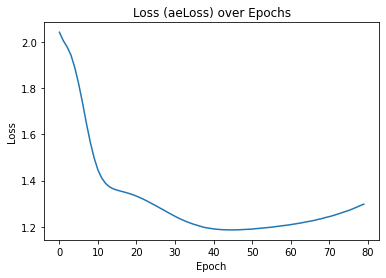

In [13]:
figureNum += 1
plt.figure(figureNum)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss (aeLoss) over Epochs')
plt.plot(loss)
plt.show()

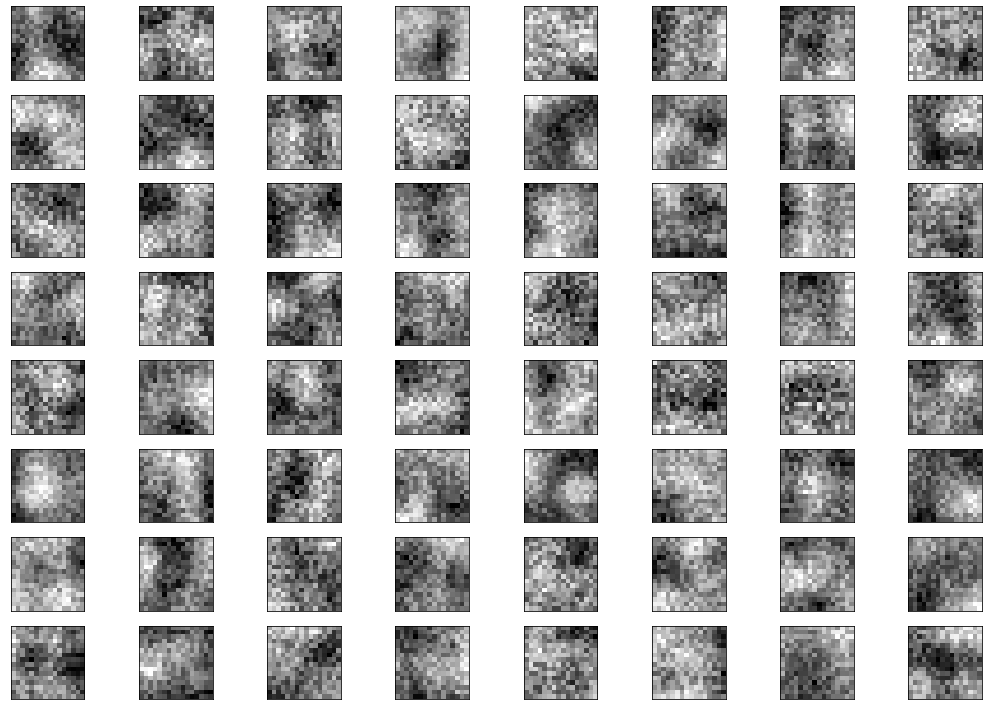

In [14]:
W1, B1, W2, B2 = We_t
W2 = np.array(W2)
W2 = W2.reshape(-1,16,16)

figureNum += 1    
plt.figure(figureNum, figsize=(18, 16))

for i in range(np.shape(W2)[0]):
    ax3 = plt.subplot(10, 8, i+1)
    ax3.imshow(W2[i], cmap='gray')
    ax3.set_yticks([])
    ax3.set_xticks([])
plt.show()    

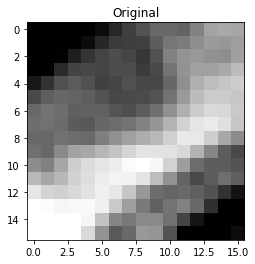

In [15]:
sample_image = 92
figureNum += 1
plt.figure(figureNum)
plt.imshow(data_final[sample_image], cmap='gray')
plt.title('Original')
plt.show(block=False)

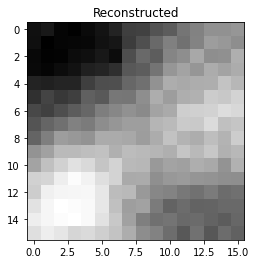

In [16]:
_,__,___, reconstructed_sample_image = forward(We_t, data_final_flat[sample_image])
figureNum += 1

reconstructed_sample_image = np.array(reconstructed_sample_image)
reconstructed_sample_image = reconstructed_sample_image.reshape(16,16)
plt.figure(figureNum)
plt.imshow(reconstructed_sample_image, cmap='gray')
plt.title('Reconstructed')
plt.show(block=False)

In [17]:
Lin_l = Lpost_l = 16**2
Lhid_l = 12
lambdaa_l = 1e-2
beta_l = 0.001
rho_l = 0.2
params_l = [Lin_l, Lhid_l, lambdaa_l, beta_l, rho_l]

In [18]:
loss_l, We_l = train_network(data_final_flat, params_l, 1e-2, 32, 50)

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40


In [19]:
Lin_m = Lpost_m = 16**2
Lhid_m = 50
lambdaa_m = 1e-2
beta_m = 0.001
rho_m = 0.2
params_m = [Lin_m, Lhid_m, lambdaa_m, beta_m, rho_m]

In [20]:
loss_m, We_m = train_network(data_final_flat, params_m, 1e-2, 32, 50)

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40


In [21]:
Lin_h = Lpost_h = 16**2
Lhid_h = 98
lambdaa_h = 1e-2
beta_h = 0.001
rho_h = 0.2
params_h = [Lin_h, Lhid_h, lambdaa_h, beta_h, rho_h]

In [22]:
loss_h, We_h = train_network(data_final_flat, params_h, 1e-2, 32, 50)

Epoch: 0
Epoch: 10
Epoch: 20
Epoch: 30
Epoch: 40


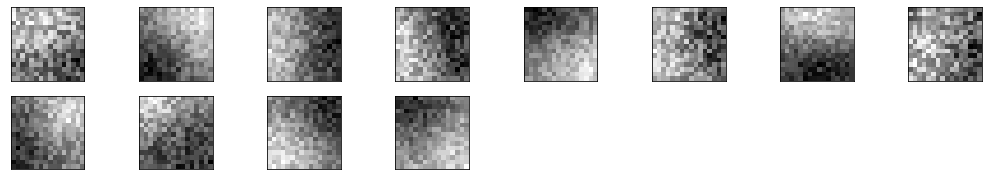

In [23]:
W1_l, B1_l, W2_l, B2_l = We_l
W2_l = np.array(W2_l)
W2_l = W2_l.reshape(-1,16,16)

figureNum += 1    
plt.figure(figureNum, figsize=(18, 16))

for i in range(np.shape(W2_l)[0]):
    ax3 = plt.subplot(10, 8, i+1)
    ax3.imshow(W2_l[i], cmap='gray')
    ax3.set_yticks([])
    ax3.set_xticks([])
plt.show()  

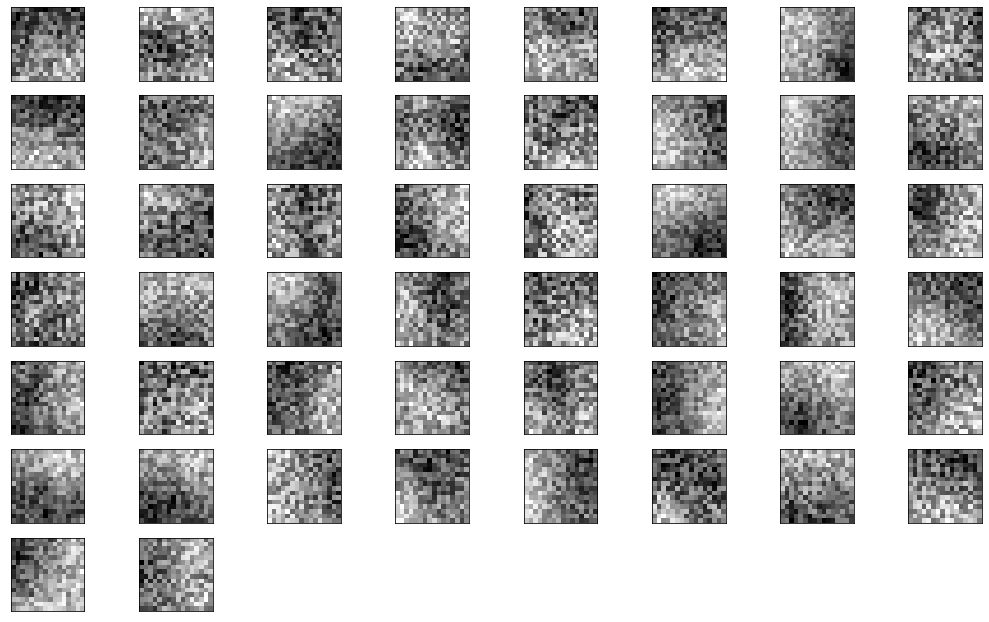

In [24]:
W1_m, B1_m, W2_m, B2_m = We_m
W2_m = np.array(W2_m)
W2_m = W2_m.reshape(-1,16,16)

figureNum += 1    
plt.figure(figureNum, figsize=(18, 16))

for i in range(np.shape(W2_m)[0]):
    ax3 = plt.subplot(10, 8, i+1)
    ax3.imshow(W2_m[i], cmap='gray')
    ax3.set_yticks([])
    ax3.set_xticks([])
plt.show()  

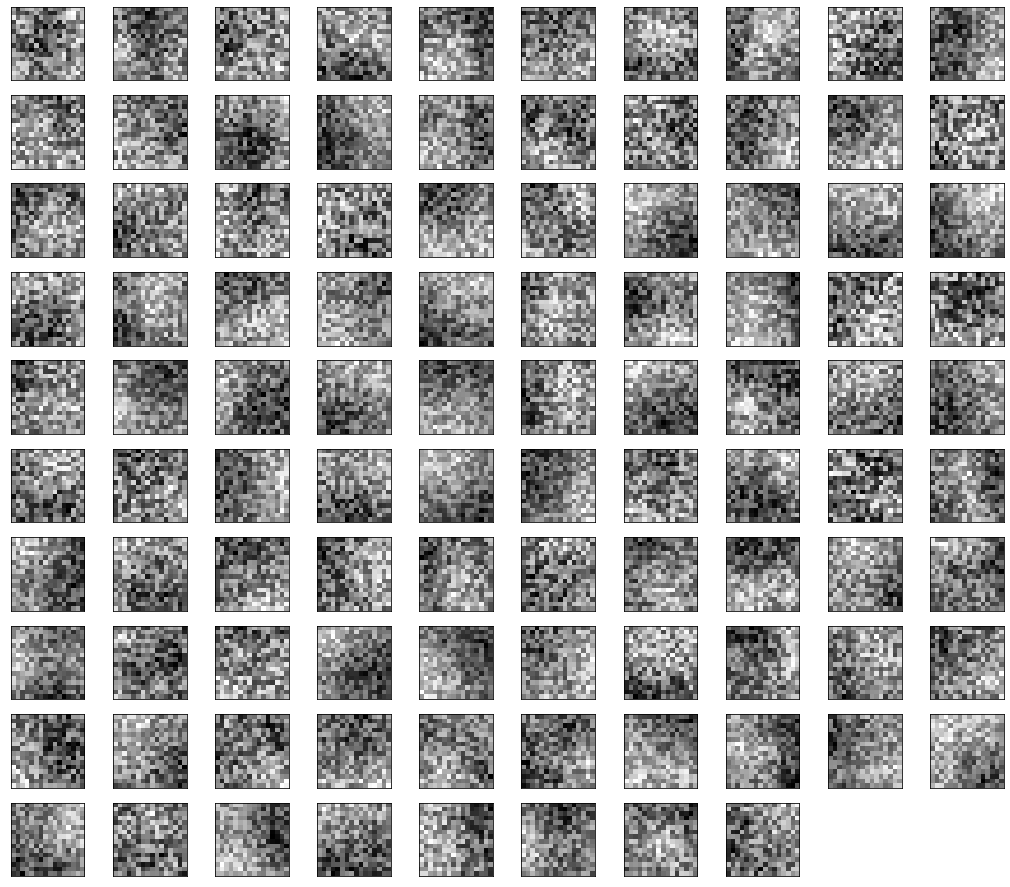

In [25]:
W1_h, B1_h, W2_h, B2_h = We_h
W2_h = np.array(W2_h)
W2_h = W2_h.reshape(-1,16,16)

figureNum += 1    
plt.figure(figureNum, figsize=(18, 16))

for i in range(np.shape(W2_h)[0]):
    ax3 = plt.subplot(10, 10, i+1)
    ax3.imshow(W2_h[i], cmap='gray')
    ax3.set_yticks([])
    ax3.set_xticks([])
plt.show()  